In [ ]:
#!pip install ntscraper

In [ ]:
#from ntscraper import Nitter

#scraper = Nitter(log_level=1)

In [ ]:
#scraped_tweet = scraper.get_tweets("UltraMilkXStrayKids", mode='hashtag', number=100)

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/DATA_UM

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/DATA_UM


In [ ]:
#save data to json

import json

#with open('result.json', 'w') as fp:
    #json.dump(scraped_tweet, fp)

In [ ]:
# Load Json Data

with open('IndomilkInYourArea.json') as json_file:
    data = json.load(json_file)

tweet_data = data['tweets']

In [ ]:
print(tweet_data[1]['stats'])

{'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}


In [ ]:
import csv

#to csv
data_file = open('IndomilkInYourArea.csv', 'w')

# create the csv writer object
csv_writer = csv.writer(data_file)

# Counter variable used for writing
# headers to the CSV file
count = 0

for tweet in tweet_data:
    if count == 0:

        # Writing headers of CSV file
        header = tweet.keys()
        csv_writer.writerow(header)
        count += 1

    # Writing data of CSV file
    csv_writer.writerow(tweet.values())

data_file.close()

In [ ]:
import pandas as pd

dframe = pd.read_csv('IndomilkInYourArea.csv')

print(dframe.text)

0      Jakarta was hot, but KRUNK was definitely hott...
1      Rasanya seneng banget bisa nonton BLACKPINK + ...
2      Waktu mimin mampir ke Indomil-K Booth ada bany...
3      Keseruan konser BLACKPINK juga bisa dirasain p...
4      The new #IndomilkInYourArea is here 🖤💗 Ada Ind...
                             ...                        
171    Kemaren berburu Oreo sekarang berburu indomilk...
172    Ada yang bisa kasih pencerahan maksud dari poi...
173    Annyeong Yeorobun 😍🎉 Siapa aja nih yang ingin ...
174    Info selengkapnya bisa dicek di website indomi...
175    BLINKs mau nonton @blackpinkofficial bareng In...
Name: text, Length: 176, dtype: object


# **SECTION FOR DATA CLEANING**

In [ ]:
import re

In [ ]:
df_clean = dframe[['text']]

####1. Penghapusan Punctuations, Angka, Link Website, dan Hashtag

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Before Remove Punctuation
#dframe.head(10)
df_clean.head(10)

,text
0,"Jakarta was hot, but KRUNK was definitely hott..."
1,Rasanya seneng banget bisa nonton BLACKPINK + ...
2,Waktu mimin mampir ke Indomil-K Booth ada bany...
3,Keseruan konser BLACKPINK juga bisa dirasain p...
4,The new #IndomilkInYourArea is here 🖤💗 Ada Ind...
5,@indomilkyourway #ndomilkBPConcert #Indomilkin...
6,@indomilkyourway #ndomilkBPConcert #Indomilkin...
7,Current mood: Kangen karena abis liatin video ...
8,"Ini dia, keseruan Indomil-K Booth di BLACKPINK..."
9,KANGGU!! YOU GUYS SO ROCK&BEST🔥🔥🔥 Thankyou fo...


In [ ]:
def remove_punct(text):
    # Remove hashtag dan @
    ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    # Remove punctiation
    text  = "".join([char for char in text if char not in string.punctuation])
    # Remove angka
    text = re.sub('[0-9]+', '', text)
    # Remove website link
    text = re.sub(r'http\S+', '', text)

    return text

df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))
df_clean.head(10)

<ipython-input-113-22b4ddc9b774>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))


,text,text_punt
0,"Jakarta was hot, but KRUNK was definitely hott...",Jakarta was hot but KRUNK was definitely hotte...
1,Rasanya seneng banget bisa nonton BLACKPINK + ...,Rasanya seneng banget bisa nonton BLACKPINK ...
2,Waktu mimin mampir ke Indomil-K Booth ada bany...,Waktu mimin mampir ke IndomilK Booth ada banya...
3,Keseruan konser BLACKPINK juga bisa dirasain p...,Keseruan konser BLACKPINK juga bisa dirasain p...
4,The new #IndomilkInYourArea is here 🖤💗 Ada Ind...,The new IndomilkInYourArea is here 🖤💗 Ada Indo...
5,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...
6,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...
7,Current mood: Kangen karena abis liatin video ...,Current mood Kangen karena abis liatin video k...
8,"Ini dia, keseruan Indomil-K Booth di BLACKPINK...",Ini dia keseruan IndomilK Booth di BLACKPINK W...
9,KANGGU!! YOU GUYS SO ROCK&BEST🔥🔥🔥 Thankyou fo...,KANGGU YOU GUYS SO ROCKBEST🔥🔥🔥 Thankyou for c...


#### 2. Remove Stopwords

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# Indonesian Stopword by Sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
def remove_stopwords(text):
    text = stopword.remove(text)
    return text

df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))
df_clean.head(10)

<ipython-input-117-ee2729099c0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))


,text,text_punt,text_stop
0,"Jakarta was hot, but KRUNK was definitely hott...",Jakarta was hot but KRUNK was definitely hotte...,Jakarta was hot but KRUNK was definitely hotte...
1,Rasanya seneng banget bisa nonton BLACKPINK + ...,Rasanya seneng banget bisa nonton BLACKPINK ...,Rasanya seneng banget nonton BLACKPINK main ...
2,Waktu mimin mampir ke Indomil-K Booth ada bany...,Waktu mimin mampir ke IndomilK Booth ada banya...,Waktu mimin mampir IndomilK Booth banyak kegia...
3,Keseruan konser BLACKPINK juga bisa dirasain p...,Keseruan konser BLACKPINK juga bisa dirasain p...,Keseruan konser BLACKPINK bisa dirasain pas nu...
4,The new #IndomilkInYourArea is here 🖤💗 Ada Ind...,The new IndomilkInYourArea is here 🖤💗 Ada Indo...,The new IndomilkInYourArea is here 🖤💗 Ada Indo...
5,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkBPConcert IndomilkinYou...
6,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkBPConcert IndomilkinYou...
7,Current mood: Kangen karena abis liatin video ...,Current mood Kangen karena abis liatin video k...,Current mood Kangen abis liatin video keseruan...
8,"Ini dia, keseruan Indomil-K Booth di BLACKPINK...",Ini dia keseruan IndomilK Booth di BLACKPINK W...,Ini keseruan IndomilK Booth BLACKPINK WORLD TO...
9,KANGGU!! YOU GUYS SO ROCK&BEST🔥🔥🔥 Thankyou fo...,KANGGU YOU GUYS SO ROCKBEST🔥🔥🔥 Thankyou for c...,KANGGU YOU GUYS SO ROCKBEST🔥🔥🔥 Thankyou for c...


####3. Stemming Sentence

In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def stemming_sentence(text):
    text = stemmer.stem(text)
    return text

df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))
df_clean.head(10)

<ipython-input-120-8a3e9041785f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))


,text,text_punt,text_stop,text_stemming
0,"Jakarta was hot, but KRUNK was definitely hott...",Jakarta was hot but KRUNK was definitely hotte...,Jakarta was hot but KRUNK was definitely hotte...,jakarta was hot but krunk was definitely hotte...
1,Rasanya seneng banget bisa nonton BLACKPINK + ...,Rasanya seneng banget bisa nonton BLACKPINK ...,Rasanya seneng banget nonton BLACKPINK main ...,rasa neng banget nonton blackpink main seru in...
2,Waktu mimin mampir ke Indomil-K Booth ada bany...,Waktu mimin mampir ke IndomilK Booth ada banya...,Waktu mimin mampir IndomilK Booth banyak kegia...,waktu mimin mampir indomilk booth banyak giat ...
3,Keseruan konser BLACKPINK juga bisa dirasain p...,Keseruan konser BLACKPINK juga bisa dirasain p...,Keseruan konser BLACKPINK bisa dirasain pas nu...,seru konser blackpink bisa dirasain pas nunggu...
4,The new #IndomilkInYourArea is here 🖤💗 Ada Ind...,The new IndomilkInYourArea is here 🖤💗 Ada Indo...,The new IndomilkInYourArea is here 🖤💗 Ada Indo...,the new indomilkinyourarea is here ada indomil...
5,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkbpconcert indomilkinyou...
6,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkbpconcert indomilkinyou...
7,Current mood: Kangen karena abis liatin video ...,Current mood Kangen karena abis liatin video k...,Current mood Kangen abis liatin video keseruan...,current mood kangen abis liatin video seru kch...
8,"Ini dia, keseruan Indomil-K Booth di BLACKPINK...",Ini dia keseruan IndomilK Booth di BLACKPINK W...,Ini keseruan IndomilK Booth BLACKPINK WORLD TO...,ini seru indomilk booth blackpink world tour b...
9,KANGGU!! YOU GUYS SO ROCK&BEST🔥🔥🔥 Thankyou fo...,KANGGU YOU GUYS SO ROCKBEST🔥🔥🔥 Thankyou for c...,KANGGU YOU GUYS SO ROCKBEST🔥🔥🔥 Thankyou for c...,kanggu you guys so rockbest thankyou for comin...


####4. Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokenization(text):
    word_token = word_tokenize(text)
    return word_token

df_clean['text_token'] = df_clean['text_stemming'].apply(lambda x: tokenization(x.lower()))
df_clean.head(10)

<ipython-input-124-f2ae7788cbeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_token'] = df_clean['text_stemming'].apply(lambda x: tokenization(x.lower()))


,text,text_punt,text_stop,text_stemming,text_token
0,"Jakarta was hot, but KRUNK was definitely hott...",Jakarta was hot but KRUNK was definitely hotte...,Jakarta was hot but KRUNK was definitely hotte...,jakarta was hot but krunk was definitely hotte...,"[jakarta, was, hot, but, krunk, was, definitel..."
1,Rasanya seneng banget bisa nonton BLACKPINK + ...,Rasanya seneng banget bisa nonton BLACKPINK ...,Rasanya seneng banget nonton BLACKPINK main ...,rasa neng banget nonton blackpink main seru in...,"[rasa, neng, banget, nonton, blackpink, main, ..."
2,Waktu mimin mampir ke Indomil-K Booth ada bany...,Waktu mimin mampir ke IndomilK Booth ada banya...,Waktu mimin mampir IndomilK Booth banyak kegia...,waktu mimin mampir indomilk booth banyak giat ...,"[waktu, mimin, mampir, indomilk, booth, banyak..."
3,Keseruan konser BLACKPINK juga bisa dirasain p...,Keseruan konser BLACKPINK juga bisa dirasain p...,Keseruan konser BLACKPINK bisa dirasain pas nu...,seru konser blackpink bisa dirasain pas nunggu...,"[seru, konser, blackpink, bisa, dirasain, pas,..."
4,The new #IndomilkInYourArea is here 🖤💗 Ada Ind...,The new IndomilkInYourArea is here 🖤💗 Ada Indo...,The new IndomilkInYourArea is here 🖤💗 Ada Indo...,the new indomilkinyourarea is here ada indomil...,"[the, new, indomilkinyourarea, is, here, ada, ..."
5,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkbpconcert indomilkinyou...,"[indomilkyourway, ndomilkbpconcert, indomilkin..."
6,@indomilkyourway #ndomilkBPConcert #Indomilkin...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkBPConcert IndomilkinYou...,indomilkyourway ndomilkbpconcert indomilkinyou...,"[indomilkyourway, ndomilkbpconcert, indomilkin..."
7,Current mood: Kangen karena abis liatin video ...,Current mood Kangen karena abis liatin video k...,Current mood Kangen abis liatin video keseruan...,current mood kangen abis liatin video seru kch...,"[current, mood, kangen, abis, liatin, video, s..."
8,"Ini dia, keseruan Indomil-K Booth di BLACKPINK...",Ini dia keseruan IndomilK Booth di BLACKPINK W...,Ini keseruan IndomilK Booth BLACKPINK WORLD TO...,ini seru indomilk booth blackpink world tour b...,"[ini, seru, indomilk, booth, blackpink, world,..."
9,KANGGU!! YOU GUYS SO ROCK&BEST🔥🔥🔥 Thankyou fo...,KANGGU YOU GUYS SO ROCKBEST🔥🔥🔥 Thankyou for c...,KANGGU YOU GUYS SO ROCKBEST🔥🔥🔥 Thankyou for c...,kanggu you guys so rockbest thankyou for comin...,"[kanggu, you, guys, so, rockbest, thankyou, fo..."


#### Save Data Checkpoint CSV

In [ ]:
df_clean.to_csv('IndomilkInYourArea.csv', encoding='utf-8', index=False)

#### Word Cloud Generate

In [ ]:
!pip install matplotlib
!pip install wordcloud

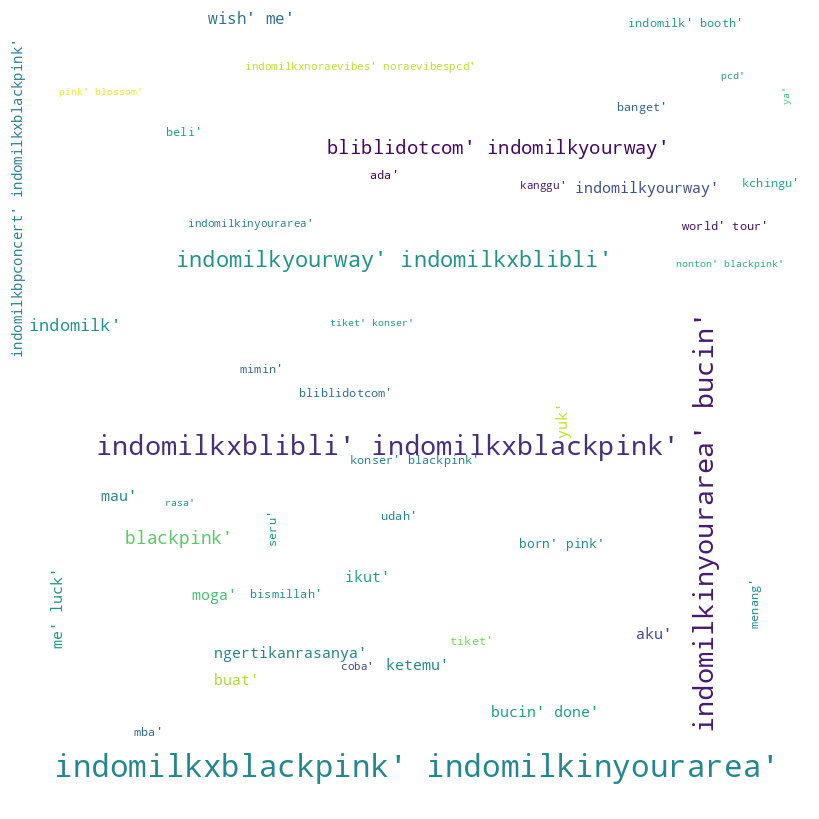

In [ ]:
## GENERATE WORD CLOUD

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = df_clean.text_token

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Frequency Word Text

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [ ]:
for sentence in df_clean.text_token:
  #print(sentence)
  for word in sentence:
    #print(word)
    fdist[word] += 1

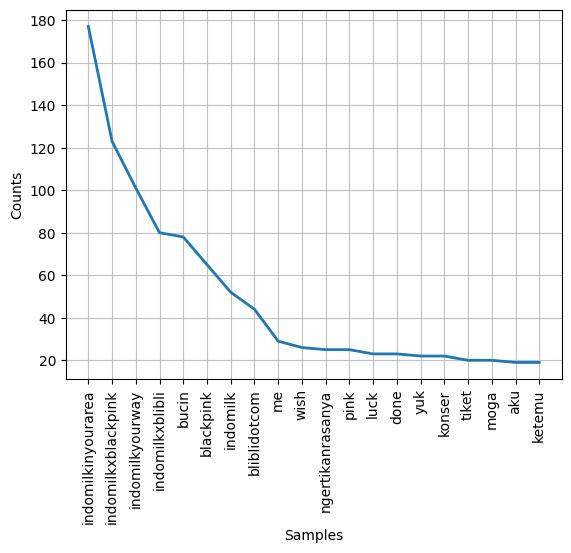

In [ ]:
fdist.plot(20)
plt.show()